In [43]:
import src.config

In [44]:
from src.datasets.loading import statcan, ookla

In [45]:
import numpy as np 
import pandas as pd
import geopandas as gp

In [46]:
import matplotlib.pyplot as plt 

In [47]:
available_file = ookla.available_files()
available_file

path
type   year quarter                                                   
fixed  2019 1        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            2        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            3        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            4        /home/jovyan/data/ookla-canada-tiles/ookla-can...
       2020 1        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            2        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            3        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            4        /home/jovyan/data/ookla-canada-tiles/ookla-can...
       2021 1        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            2        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            3        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            4        /home/jovyan/data/ookla-canada-tiles/ookla-can...
       2022 1        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            2        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            3        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            4        /home/jovyan/data/ookla-canada-tiles/ookla-can...
       2023 1        /home/jovyan/data/ookla-canada-tiles/ookla-can...
mobile 2019 1        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            2        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            3        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            4        /home/jovyan/data/ookla-canada-tiles/ookla-can...
       2020 1        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            2        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            3        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            4        /home/jovyan/data/ookla-canada-tiles/ookla-can...
       2021 1        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            2        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            3        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            4        /home/jovyan/data/ookla-canada-tiles/ookla-can...
       2022 1        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            2        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            3        /home/jovyan/data/ookla-canada-tiles/ookla-can...
            4        /home/jovyan/data/ookla-canada-tiles/ookla-can...
       2023 1        /home/jovyan/data/ookla-canada-tiles/ookla-can...

In [7]:
speed_data = ookla.speed_data()

In [21]:
speed_data.value_counts()

quadkey          avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  conn_type  year  quarter
13230212122122   544197      269445      19          1      1        fixed      2022  4          1
302303221032211  5561        146         36          1      1        mobile     2021  2          1
302303221032210  107866      33210       16          43     15       fixed      2020  2          1
                 109871      12326       91          40     11       fixed      2019  3          1
                 135340      83441       19          25     13       fixed      2021  1          1
                                                                                                ..
213123211102303  153080      42031       17          183    43       fixed      2020  3          1
                 168428      49893       8           116    35       fixed      2020  4          1
                 182649      73198       9           87     34       fixed      2021  1          1
               

In [8]:
# Data Cleaning
speed_data = speed_data.dropna()   # Drop missing values
speed_data.value_counts()

quadkey          avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  conn_type  year  quarter
13230212122122   544197      269445      19          1      1        fixed      2022  4          1
302303221032211  5561        146         36          1      1        mobile     2021  2          1
302303221032210  107866      33210       16          43     15       fixed      2020  2          1
                 109871      12326       91          40     11       fixed      2019  3          1
                 135340      83441       19          25     13       fixed      2021  1          1
                                                                                                ..
213123211102303  153080      42031       17          183    43       fixed      2020  3          1
                 168428      49893       8           116    35       fixed      2020  4          1
                 182649      73198       9           87     34       fixed      2021  1          1
               

In [34]:
# Converting Year and Quarter columns to datetime object
speed_data['year_quarter'] = pd.PeriodIndex(speed_data['year'].astype(str) + 'Q' + speed_data['quarter'].astype(str), freq='Q')

speed_data.head(5)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter,year_quarter
0,302303331012303,130704,26290,11,8,6,fixed,2019,1,2019Q1
1,212122230130321,100966,55007,8,118,23,fixed,2019,1,2019Q1
2,212120311013031,890,2432,362,5,2,fixed,2019,1,2019Q1
3,212102012132221,36347,11509,14,44,1,fixed,2019,1,2019Q1
4,212122232013120,59481,23797,10,45,13,fixed,2019,1,2019Q1


In [30]:
speed_data_grouped = speed_data.groupby('year_quarter')['avg_d_kbps'].mean().reset_index()
print(speed_data_grouped.head())

  year_quarter    avg_d_kbps
0       2019Q1  63279.676350
1       2019Q2  61915.574211
2       2019Q3  63288.908556
3       2019Q4  69811.765799
4       2020Q1  72373.162978


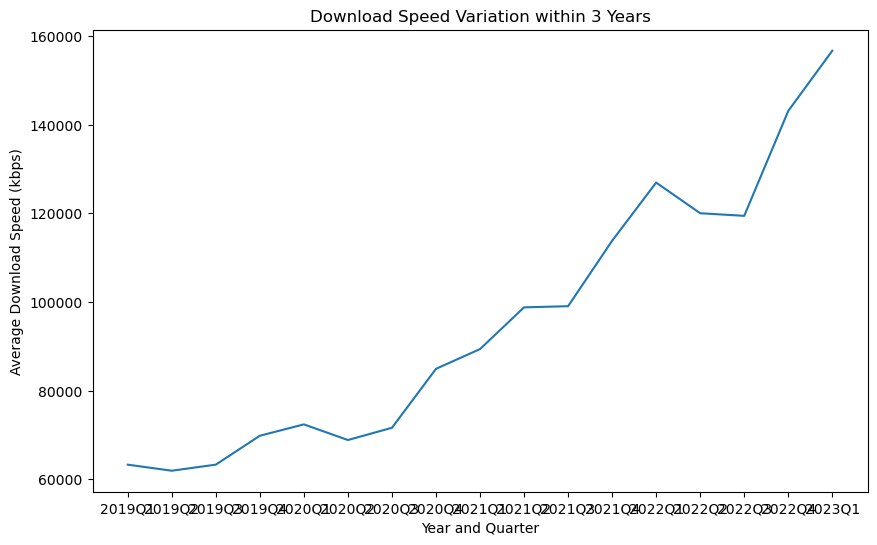

In [40]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(speed_data_grouped['year_quarter'].astype(str), speed_data_grouped['avg_d_kbps'])
plt.xlabel('Year and Quarter')
plt.ylabel('Average Download Speed (kbps)')
plt.title('Download Speed Variation within 3 Years')
plt.show()

In [ ]:
speed_data_grouped_by_quarter = speed_data.groupby('quarter')['avg_d_kbps'].mean().reset_index()
speed_data_grouped_by_quarter

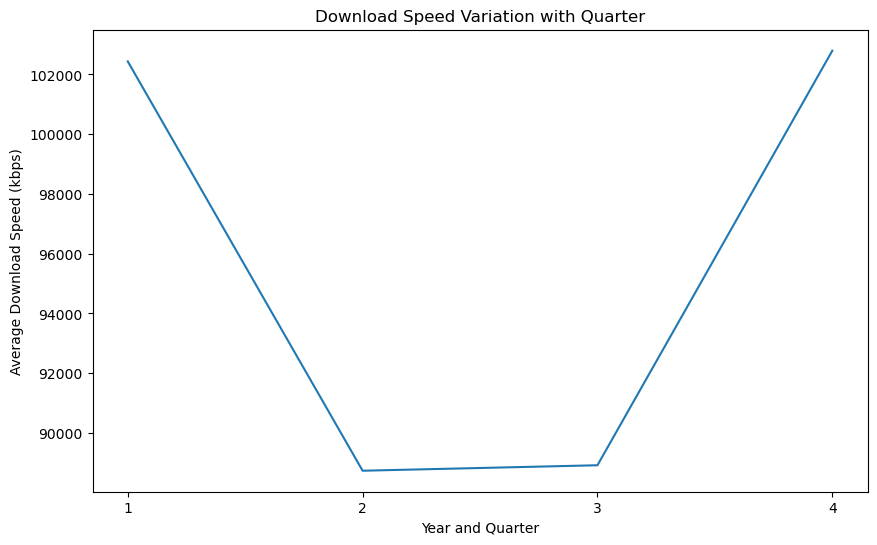

In [39]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(speed_data_grouped_by_quarter['quarter'].astype(str), speed_data_grouped_by_quarter['avg_d_kbps'])
plt.xlabel('Year and Quarter')
plt.ylabel('Average Download Speed (kbps)')
plt.title('Download Speed Variation with Quarter')
plt.show()

In [11]:
speed_data['tests_per_device']=speed_data['tests']/speed_data['devices']
speed_data[['avg_d_kbps','avg_u_kbps','tests','devices','tests_per_device']].corr()

,avg_d_kbps,avg_u_kbps,tests,devices,tests_per_device
avg_d_kbps,1.000000,0.631807,0.143686,0.189906,-0.002173
avg_u_kbps,0.631807,1.000000,0.109965,0.147757,0.001540
tests,0.143686,0.109965,1.000000,0.735558,0.442158
devices,0.189906,0.147757,0.735558,1.000000,0.031616
tests_per_device,-0.002173,0.001540,0.442158,0.031616,1.000000


<Figure size 1000x600 with 0 Axes>

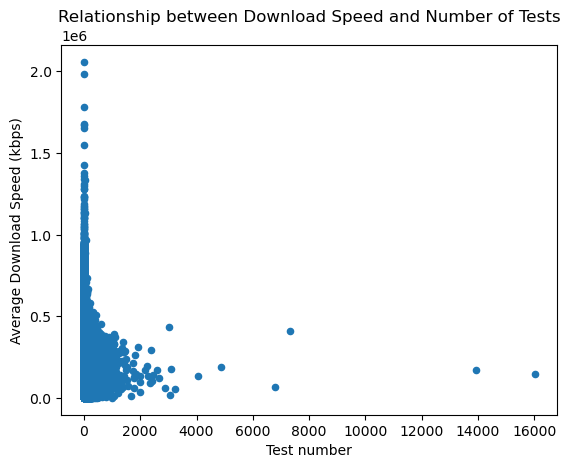

In [9]:
speed_data_grouped_by_tests = speed_data.groupby('tests')['avg_d_kbps'].mean().reset_index()
# Data Visualization
plt.figure(figsize=(10, 6))
speed_data.plot(kind='scatter', x='tests', y='avg_d_kbps')
plt.xlabel('Test number')
plt.ylabel('Average Download Speed (kbps)')
plt.title('Relationship between Download Speed and Number of Tests')
plt.show()

<Figure size 1000x600 with 0 Axes>

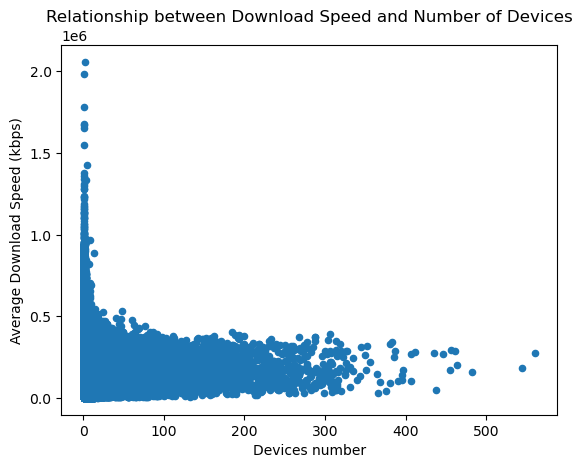

In [10]:
speed_data_grouped_by_tests = speed_data.groupby('devices')['avg_d_kbps'].mean().reset_index()
# Data Visualization
plt.figure(figsize=(10, 6))
speed_data.plot(kind='scatter', x='devices', y='avg_d_kbps')
plt.xlabel('Devices number')
plt.ylabel('Average Download Speed (kbps)')
plt.title('Relationship between Download Speed and Number of Devices')
plt.show()

<Figure size 1000x600 with 0 Axes>

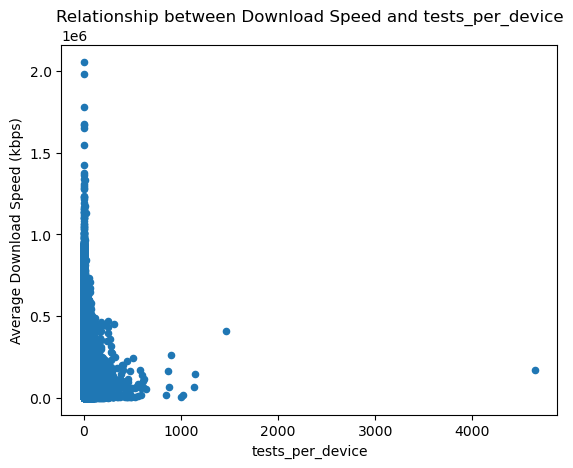

In [12]:

# Data Visualization
plt.figure(figsize=(10, 6))
speed_data.plot(kind='scatter', x='tests_per_device', y='avg_d_kbps')
plt.xlabel('tests_per_device')
plt.ylabel('Average Download Speed (kbps)')
plt.title('Relationship between Download Speed and tests_per_device')
plt.show()

In [33]:
canada_speed_tiles = ookla.canada_speed_tiles()
canada_speed_tiles

,quadkey,geometry,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,conn_type,year,quarter
0,302303331012303,"POLYGON ((-73.36121 45.53329, -73.35571 45.533...",130704,26290,11,8,6,fixed,2019,1
1,302303331012303,"POLYGON ((-73.36121 45.53329, -73.35571 45.533...",155185,35459,12,23,5,fixed,2019,2
2,302303331012303,"POLYGON ((-73.36121 45.53329, -73.35571 45.533...",49799,11468,15,60,12,fixed,2019,3
3,302303331012303,"POLYGON ((-73.36121 45.53329, -73.35571 45.533...",55197,14922,14,27,13,fixed,2019,4
4,302303331012303,"POLYGON ((-73.36121 45.53329, -73.35571 45.533...",73777,12470,14,20,10,fixed,2020,1
...,...,...,...,...,...,...,...,...,...,...
3902187,303301212220132,"POLYGON ((-52.70142 47.56541, -52.69592 47.565...",162419,16678,52,1,1,mobile,2023,1
3902188,303301221030232,"POLYGON ((-52.98706 47.43180, -52.98157 47.431...",124113,22752,62,1,1,mobile,2023,1
3902189,303301221032001,"POLYGON ((-52.99255 47.42809, -52.98706 47.428...",250184,71188,48,1,1,mobile,2023,1
3902190,303302011000033,"POLYGON ((-55.17883 47.02895, -55.17334 47.028...",26804,11707,38,5,2,mobile,2023,1


In [8]:
popctrs = statcan.boundary('population_centres')

In [34]:
popctrs

,PCUID,PCNAME,PCTYPE,PCPUID,PCCLASS,PRUID,PRNAME,CMAUID,CMANAME,CMATYPE,CMAPUID,geometry
0,0300,Fortune,4,100300,2,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,NaN,NaN,NaN,NaN,"POLYGON ((8814306.340 1975116.377, 8814294.583..."
1,0311,Gander,1,100311,2,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,011,Gander,D,10011,"POLYGON ((8774241.249 2203304.440, 8774340.869..."
2,0329,Grand Bank,4,100329,2,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,NaN,NaN,NaN,NaN,"POLYGON ((8817881.080 1980819.671, 8817890.063..."
3,0332,Grand Falls-Windsor,1,100332,2,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,010,Grand Falls-Windsor,D,10010,"POLYGON ((8713608.417 2159194.443, 8713536.711..."
4,0994,Wabana,4,100994,2,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,NaN,NaN,NaN,NaN,"POLYGON ((8960434.160 2150870.983, 8960420.171..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1392,Cambridge Bay,4,621392,2,62,Nunavut,NaN,NaN,NaN,NaN,"POLYGON ((5693087.300 3673041.714, 5693078.646..."
1006,1393,Arviat,4,621393,2,62,Nunavut,NaN,NaN,NaN,NaN,"POLYGON ((6086430.914 2754980.477, 6086670.566..."
1007,1439,Baker Lake,4,621439,2,62,Nunavut,NaN,NaN,NaN,NaN,"POLYGON ((6005638.106 3107769.754, 6005661.523..."
1008,1440,Kugluktuk,4,621440,2,62,Nunavut,NaN,NaN,NaN,NaN,"POLYGON ((5270072.754 3651463.446, 5270060.754..."


In [14]:
phh_csv_data = statcan.phh_csv_data()

In [15]:
phh_csv_data

,PHH_ID,Type,Pop2016,TDwell2016_TLog2016,URDwell2016_RH2016,DBUID_Ididu,HEXUID_IdUHEX,Pruid_Pridu,Latitude,Longitude
0,5478817,5,12.000000,5.800000,4.000000,62050022011,NU64320960,62,64.319989,-96.015926
1,5479265,6,14.750000,4.000000,3.250000,62050024004,NU64320960,62,64.319741,-96.016213
2,5480341,5,0.909091,0.272727,0.272727,62080027012,NU68650959,62,68.625846,-95.876734
3,5480380,6,2.636364,0.454545,0.454545,62080027018,NU68650959,62,68.625570,-95.876786
4,5478363,5,3.400000,0.600000,0.600000,62050017004,NU62190926,62,62.173519,-92.583721
...,...,...,...,...,...,...,...,...,...,...
5638120,5501123,2,0.034404,0.162844,0.016055,47180260045,SK54021046,47,54.029665,-104.616411
5638121,5501124,2,0.306122,0.142857,0.142857,47180260076,SK54881028,47,54.891821,-102.820750
5638122,5501125,2,10.000000,16.000000,6.000000,47180260031,SK54851021,47,54.879415,-102.145630
5638123,5501126,2,0.409836,1.114754,0.213115,47180260064,SK54041051,47,54.025036,-105.122773


In [48]:
from pathlib import Path

In [49]:
output_name = "LastFourQuartersOrBestEstimate_On_DissolvedSmallerCitiesHexes"
output_dir = src.config.DATA_DIRECTORY / "processed" / "statistical_geometries"
output_dir.mkdir(exist_ok=True)

In [50]:
popctrs = statcan.boundary('population_centres')

In [51]:
derived_geometry = (Path(src.config.DATA_DIRECTORY) / 'processed' / 'geometries').resolve()

speed_data = gp.read_file(derived_geometry / 'hexagons_w_dissolved_smaller_popctrs.geojson')#, driver='GeoJSON')
#speed_data = speed_data.to_crs(CRS)
# speed_data.crs = popctrs.crs #assign crs b/c geojson assumes GPS/epsg:4326
speed_data = speed_data.dropna(subset=['HEXUID_PCPUID'])

In [52]:
speed_data.columns

Index(['PCPUID', 'pc_area', 'hex_area', 'hex_frac', 'pc_frac', 'HEXUID_PCPUID',
       'PRCODE', 'PCNAME', 'PCCLASS', 'Pop2016', 'TDwell2016_TLog2016',
       'URDwell2016_RH2016', 'PHH_Count', 'Common_Type',
       'Pop2016_at_50_10_Combined', 'TDwell2016_at_50_10_Combined',
       'URDwell_at_50_10_Combined', 'Pop_Avail_50_10', 'TDwell_Avail_50_10',
       'URDwell_Avail_50_10', 'geometry'],
      dtype='object')

In [53]:
CRS = 'EPSG:4326'
tiles = ookla.canada_speed_tiles()#.loc[lambda s:(s.year==2022 ) & (s.conn_type=='fixed')]
tiles = tiles.to_crs(CRS)

In [54]:
tiles.columns

Index(['quadkey', 'geometry', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms',
       'tests', 'devices', 'conn_type', 'year', 'quarter'],
      dtype='object')

In [55]:
# unique_tiles = tiles[['quadkey','geometry']].drop_duplicates()
unique_tiles = tiles.drop_duplicates()
unique_tiles = unique_tiles.sjoin(speed_data.to_crs(tiles.crs))
unique_tiles = unique_tiles.drop(['index_right'],axis=1)

In [56]:
unique_tiles.columns

Index(['quadkey', 'geometry', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms',
       'tests', 'devices', 'conn_type', 'year', 'quarter', 'PCPUID', 'pc_area',
       'hex_area', 'hex_frac', 'pc_frac', 'HEXUID_PCPUID', 'PRCODE', 'PCNAME',
       'PCCLASS', 'Pop2016', 'TDwell2016_TLog2016', 'URDwell2016_RH2016',
       'PHH_Count', 'Common_Type', 'Pop2016_at_50_10_Combined',
       'TDwell2016_at_50_10_Combined', 'URDwell_at_50_10_Combined',
       'Pop_Avail_50_10', 'TDwell_Avail_50_10', 'URDwell_Avail_50_10'],
      dtype='object')

In [75]:
unique_tiles[['avg_d_kbps','URDwell2016_RH2016','TDwell2016_TLog2016']].describe()

,avg_d_kbps,URDwell2016_RH2016,TDwell2016_TLog2016
count,5.170897e+06,5.170897e+06,5.170897e+06
mean,9.828963e+04,9.307280e+02,9.949395e+02
std,1.044673e+05,4.636452e+03,5.000136e+03
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.807300e+04,0.000000e+00,0.000000e+00
50%,6.402100e+04,0.000000e+00,0.000000e+00
75%,1.456950e+05,0.000000e+00,0.000000e+00
max,2.057789e+06,5.107542e+04,5.843926e+04


In [74]:
unique_tiles['year']

0          2019
1          2019
2          2019
3          2019
4          2020
           ... 
3902140    2023
3902140    2023
3902174    2023
3902174    2023
3902183    2023
Name: year, Length: 5170897, dtype: int64

In [58]:
unique_tiles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5170897 entries, 0 to 3902183
Data columns (total 30 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   quadkey                       int64   
 1   geometry                      geometry
 2   avg_d_kbps                    int64   
 3   avg_u_kbps                    int64   
 4   avg_lat_ms                    int64   
 5   tests                         int64   
 6   devices                       int64   
 7   conn_type                     object  
 8   year                          int64   
 9   quarter                       int64   
 10  PCPUID                        object  
 11  pc_area                       float64 
 12  hex_area                      float64 
 13  hex_frac                      float64 
 14  pc_frac                       float64 
 15  HEXUID_PCPUID                 object  
 16  PRCODE                        object  
 17  PCNAME                        object  
 18 

In [77]:
unique_tiles
# tiles_1000 = unique_tiles[unique_tiles['year'] == 2016]
tiles_1000 = unique_tiles.sample(n=5000, replace=False, random_state=42)


<Figure size 1000x600 with 0 Axes>

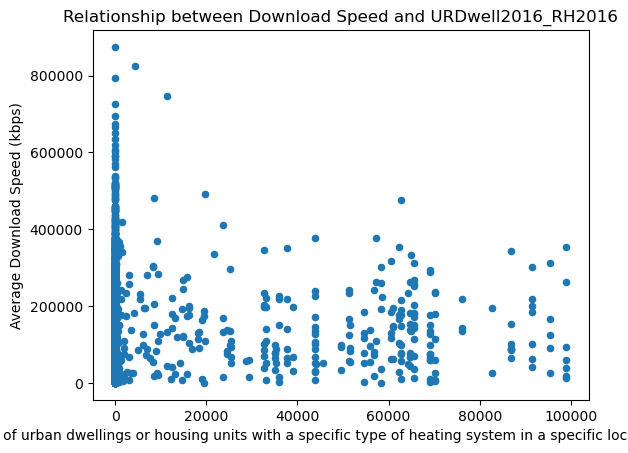

In [86]:
# Data Visualization
plt.figure(figsize=(10, 6))
tiles_1000.plot(kind='scatter', x='Pop2016_at_50_10_Combined', y='avg_d_kbps')
plt.xlabel('the proportion of urban dwellings or housing units with a specific type of heating system in a specific location in the year 2016')
plt.ylabel('Average Download Speed (kbps)')
plt.title('Relationship between Download Speed and URDwell2016_RH2016')
plt.show()

In [11]:
popctrs = statcan.boundary('population_centres')